In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from pyseqlogo.pyseqlogo import draw_logo, setup_axis, draw_protein
from pyseqlogo.format_utils import read_alignment, calc_relative_information, format_matrix
from Bio import motifs
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [2]:
ALL_SCORES1 = [[('C', 0.02247014831444764),
              ('T', 0.057903843733384308),
              ('A', 0.10370837683591219),
              ('G', 0.24803586793255664)],
             [('T', 0.046608227674354567),
              ('G', 0.048827667087419063),
              ('A', 0.084338697696451109),
              ('C', 0.92994511407402669)],
             [('G', 0.0),
              ('T', 0.011098351287382456),
              ('A', 0.022196702574764911),
              ('C', 1.8164301607015951)],
             [('C', 0.020803153636453006),
              ('T', 0.078011826136698756),
              ('G', 0.11268374886412044),
              ('A', 0.65529933954826969)],
             [('T', 0.017393530660176126),
              ('A', 0.030438678655308221),
              ('G', 0.22611589858228964),
              ('C', 0.45078233627623127)],
             [('G', 0.022364103549245576),
              ('A', 0.043412671595594352),
              ('T', 0.097349627214363091),
              ('C', 0.1657574733649966)],
             [('C', 0.03264675899941203),
              ('T', 0.045203204768416654),
              ('G', 0.082872542075430544),
              ('A', 1.0949220710572034)],
             [('C', 0.0),
              ('T', 0.0076232429756614498),
              ('A', 0.011434864463492175),
              ('G', 1.8867526364762088)],
             [('C', 0.0018955903000026028),
              ('T', 0.0094779515000130137),
              ('A', 0.35637097640048931),
              ('G', 0.58005063180079641)],
             [('A', 0.01594690817903021),
              ('C', 0.017541598996933229),
              ('T', 0.2774762023151256),
              ('G', 0.48638069946042134)],
             [('A', 0.003770051401807444),
              ('C', 0.0075401028036148881),
              ('T', 0.011310154205422331),
              ('G', 1.8624053924928772)],
             [('C', 0.036479877757360731),
              ('A', 0.041691288865555121),
              ('T', 0.072959755514721461),
              ('G', 1.1517218549109602)],
             [('G', 0.011831087684038642),
              ('T', 0.068620308567424126),
              ('A', 0.10174735408273231),
              ('C', 1.0009100180696691)],
             [('C', 0.015871770937774379),
              ('T', 0.018757547471915176),
              ('A', 0.32176408355669878),
              ('G', 0.36505073156881074)],
             [('A', 0.022798100897300954),
              ('T', 0.024064662058262118),
              ('G', 0.24571286522646588),
              ('C', 0.34070495229855319)]]

ALL_SCORES2 = [[('A', 0.01653482213365913),
              ('G', 0.026710097292833978),
              ('C', 0.035613463057111966),
              ('T', 0.057235922770358522)],
             [('C', 0.020055669245080433),
              ('G', 0.023816107228533015),
              ('A', 0.031336983195438178),
              ('T', 0.058913528407423782)],
             [('T', 0.018666958185377256),
              ('G', 0.084001311834197651),
              ('A', 0.093334790926886277),
              ('C', 0.30333807051238043)],
             [('C', 0.0),
              ('G', 0.0),
              ('A', 0.32027512306044359),
              ('T', 0.82203948252180525)],
             [('C', 0.012698627658037786),
              ('A', 0.053334236163758708),
              ('T', 0.096509570201087178),
              ('G', 0.10920819785912497)],
             [('C', 0.0),
              ('G', 0.089472611853783468),
              ('A', 0.1930724782107959),
              ('T', 0.22132698721725386)],
             [('C', 0.020962390607965918),
              ('A', 0.026202988259957396),
              ('G', 0.066380903591892068),
              ('T', 0.07336836712788071)],
             [('G', 0.0),
              ('A', 0.10236420974570831),
              ('C', 0.15354631461856247),
              ('T', 0.29173799777526871)],
             [('G', 0.027681850851852024),
              ('C', 0.089966015268519078),
              ('A', 0.089966015268519078),
              ('T', 0.53287562889815143)],
             [('A', 0.034165612000664765),
              ('C', 0.06833122400132953),
              ('G', 0.072601925501412631),
              ('T', 0.28186629900548432)],
             [('G', 0.0),
              ('A', 0.037325935579058833),
              ('C', 0.23328709736911771),
              ('T', 0.72785574379164719)],
             [('A', 0.017470244196759552),
              ('C', 0.062892879108334396),
              ('G', 0.094339318662501587),
              ('T', 0.19916078384305891)],
             [('G', 0.0),
              ('A', 0.096447131567581681),
              ('C', 0.15844885900388422),
              ('T', 0.48223565783790845)],
             [('G', 0.0),
              ('A', 0.069291952024925829),
              ('C', 0.20787585607477749),
              ('T', 0.46425607856700307)],
             [('G', 0.0),
              ('A', 0.0),
              ('C', 0.21713201856318373),
              ('T', 1.1495224512168551)],
             [('G', 0.0),
              ('A', 0.048934292002649343),
              ('T', 0.27263391258618919),
              ('C', 0.42642740173737281)],
             [('A', 0.0),
              ('G', 0.053607190685875404),
              ('C', 0.2054942309625224),
              ('T', 0.69689347891638032)],
             [('G', 0.0),
              ('A', 0.0),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)],
             [('G', 0.0),
              ('C', 0.068079835765814778),
              ('A', 0.068079835765814778),
              ('T', 1.3207488138568066)],
             [('G', 0.020257705570431345),
              ('A', 0.020257705570431345),
              ('C', 0.048618493369035232),
              ('T', 0.055371061892512348)],
             [('G', 0.0),
              ('A', 0.076286510680262556),
              ('C', 0.20538675952378382),
              ('T', 0.34622339462580698)]]



# Default mode is bits

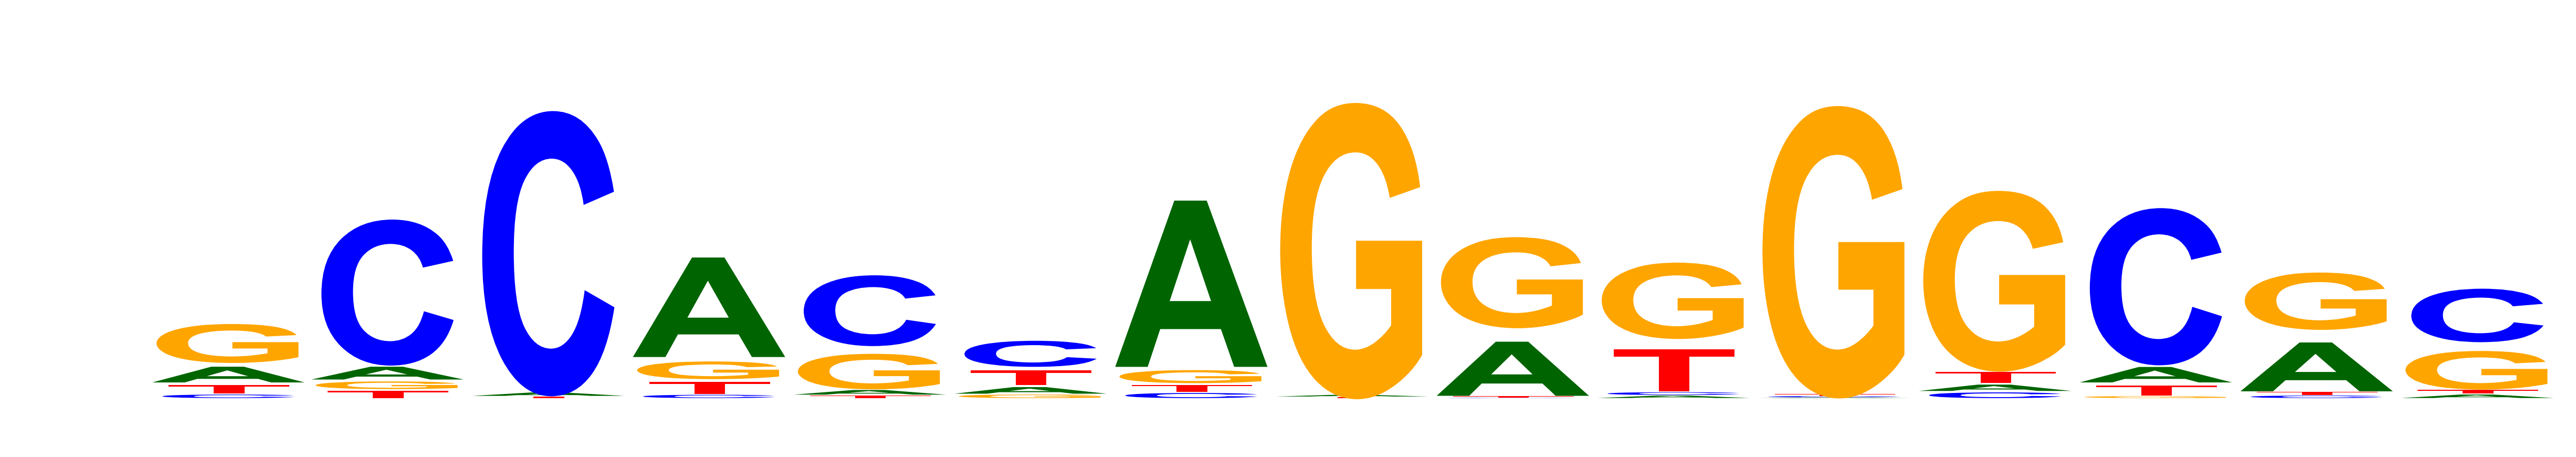

In [3]:
plt.rcParams['figure.dpi'] = 300
fig, axarr = draw_logo(ALL_SCORES1, coordinate_type='data')
fig.tight_layout()

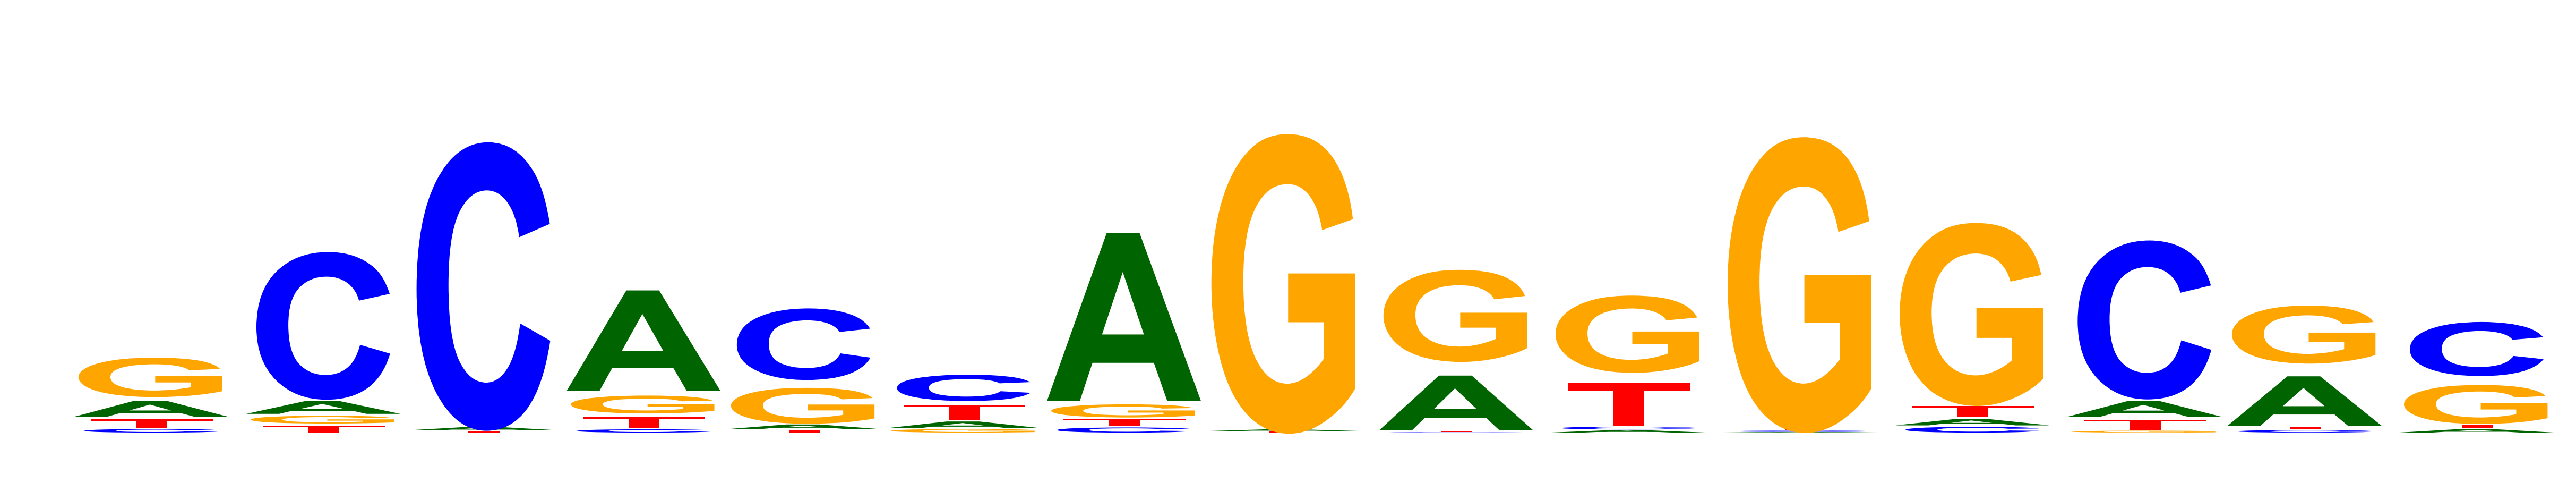

In [4]:
plt.rcParams['figure.dpi'] = 300
fig, axarr = draw_logo(ALL_SCORES1, coordinate_type='ds')
fig.tight_layout()

(<matplotlib.figure.Figure at 0x7fe9c0a86e90>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9c0a6a050>]], dtype=object))

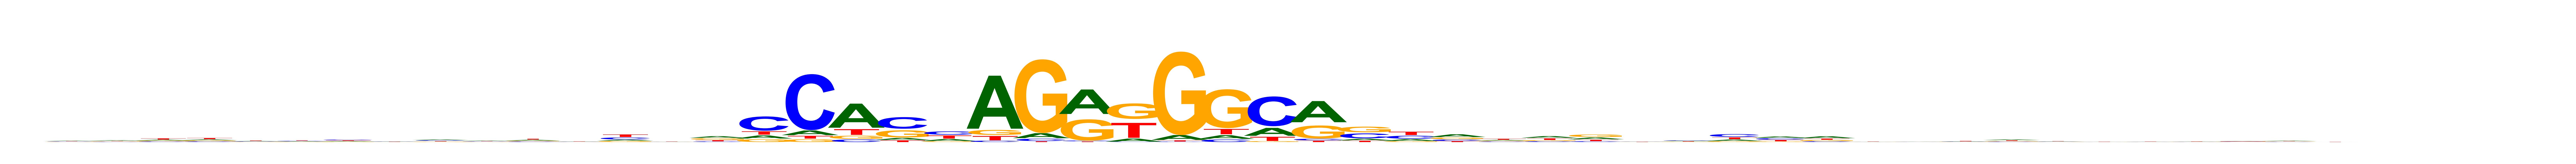

In [5]:
data = '../data/K562_ATF1_all_m_lcr_100.fa_archs_reclust_wms.tr'
draw_logo(data, data_type='transfac')


# Fasta

(<matplotlib.figure.Figure at 0x7fe9c4473cd0>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9c4473b10>]], dtype=object))

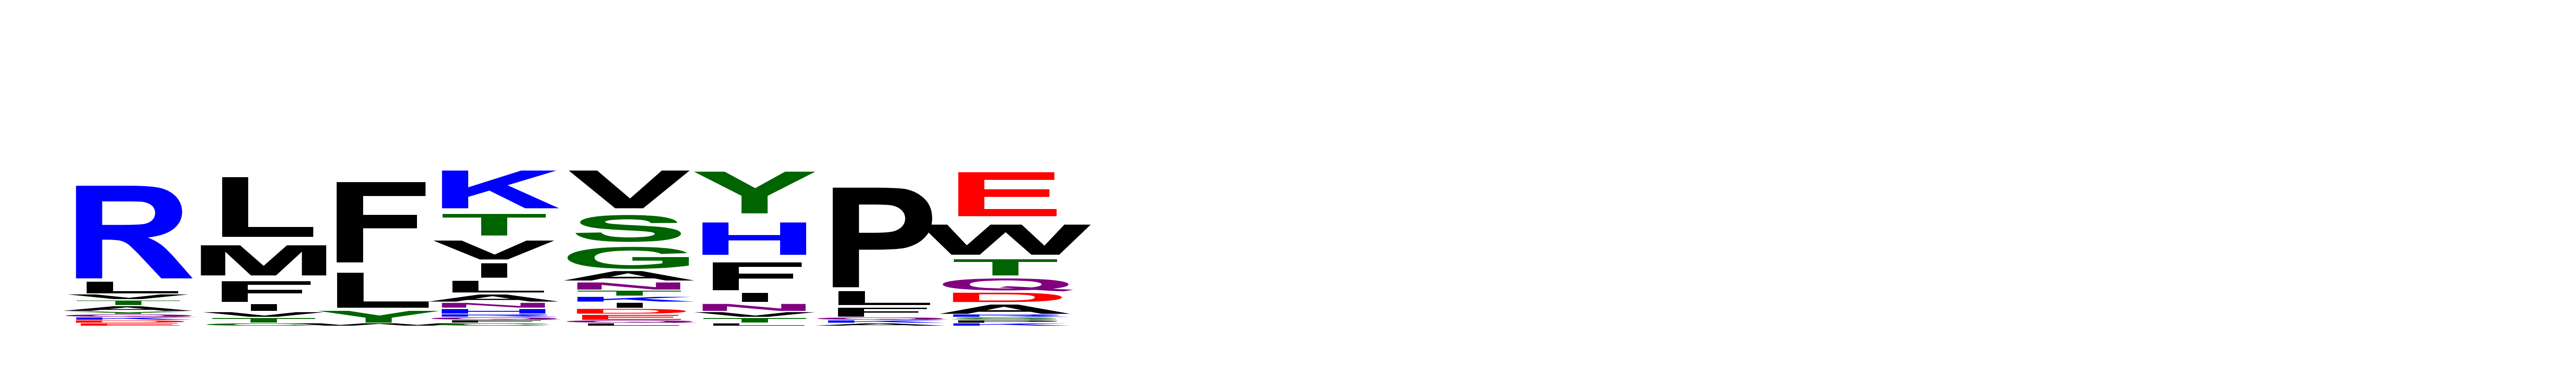

In [6]:
data = '../data/globin_aa.fasta'
draw_logo(data, data_type='fasta', 
          yaxis='probability',         
          draw_range = [61, 69],
          seq_type='amino_acid', 
          colorscheme='chemistry',
          coordinate_type='ds')

In [ ]:
seqs = []
from Bio import SeqIO
with open(data, 'r') as f:
    for record in SeqIO.parse(f, 'fasta'):
        seqs.append((record.id,record.seq))

In [ ]:
[(x, len(y)) for x,y in seqs]

In [ ]:
from Bio import motifs
data = '../data/K562_ATF1_all_m_lcr_100.fa_archs_reclust_wms.tr'
motifs = motifs.parse(open(data, 'r'), 'transfac')
for motif in motifs:
    name = list(motif.viewvalues())[0]
    total = int(name.split('(')[1].replace('seqs)', ''))
    pfm = dict(motif.counts.normalize())
    ic = calc_relative_information(pfm, total)

In [ ]:
motif.counts

In [ ]:
format_matrix(ic)

In [ ]:
fig, axarr = draw_logo(format_matrix(ic), data_type='bits')
fig.tight_layout()

In [ ]:

fig, axarr = draw_logo(motif.counts, data_type='counts', yaxis='probability')
fig.tight_layout()

In [ ]:
list(motif.viewvalues())

In [ ]:
fig, axarr = draw_logo(ALL_SCORES1)
fig.tight_layout()

In [ ]:
fig, axarr = draw_logo(ALL_SCORES1)
fig.tight_layout()

In [ ]:
fig, axarr = draw_logo(ALL_SCORES1)
fig.tight_layout()

In [ ]:
fig, axarr = draw_logo(ALL_SCORES1[:4])
fig.tight_layout()

# Colorscheme

In [ ]:
plt.rcParams['figure.dpi'] = 300
fig, axarr = draw_logo(ALL_SCORES1, data_type='bits', colorscheme='meme')
fig.tight_layout()

# Counts as input

In [ ]:
counts = {'A' : [3,4,5,6], 'C': [2,3,1,1], 'T': [2,1,3,1], 'G': [3,2,1,2]}
fig, axarr = draw_logo(counts, data_type='counts', yaxis='probability')
fig.tight_layout()

# Different font!

In [ ]:
fig, axarr = draw_logo(counts, data_type='counts', yaxis='probability', fontfamily='Comic Sans MS')
fig.tight_layout()

# Plot conservation scores

In [ ]:
from matplotlib import transforms
ALL_SCORES = [[('G', 0.1),
              ('A', 0.1),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)]] * 6
stem_scores = np.random.rand(6)
fig, axarr = draw_logo(ALL_SCORES, data_type='bits', nrow= 2,ncol=1)
trans_offset = transforms.offset_copy(axarr[1,0].transData,
                                     fig=fig,
                                     x=460,
                                      y=100,
                                     units='dots')
ax = axarr[0,0]
axarr[1,0].stem(stem_scores)#, transform=axarr[0,0].transData)
#setup_axis(axarr[1,0], axis='y', majorticks=1, minorticks=0.1)
#fig.tight_layout()

# Protein with fasta

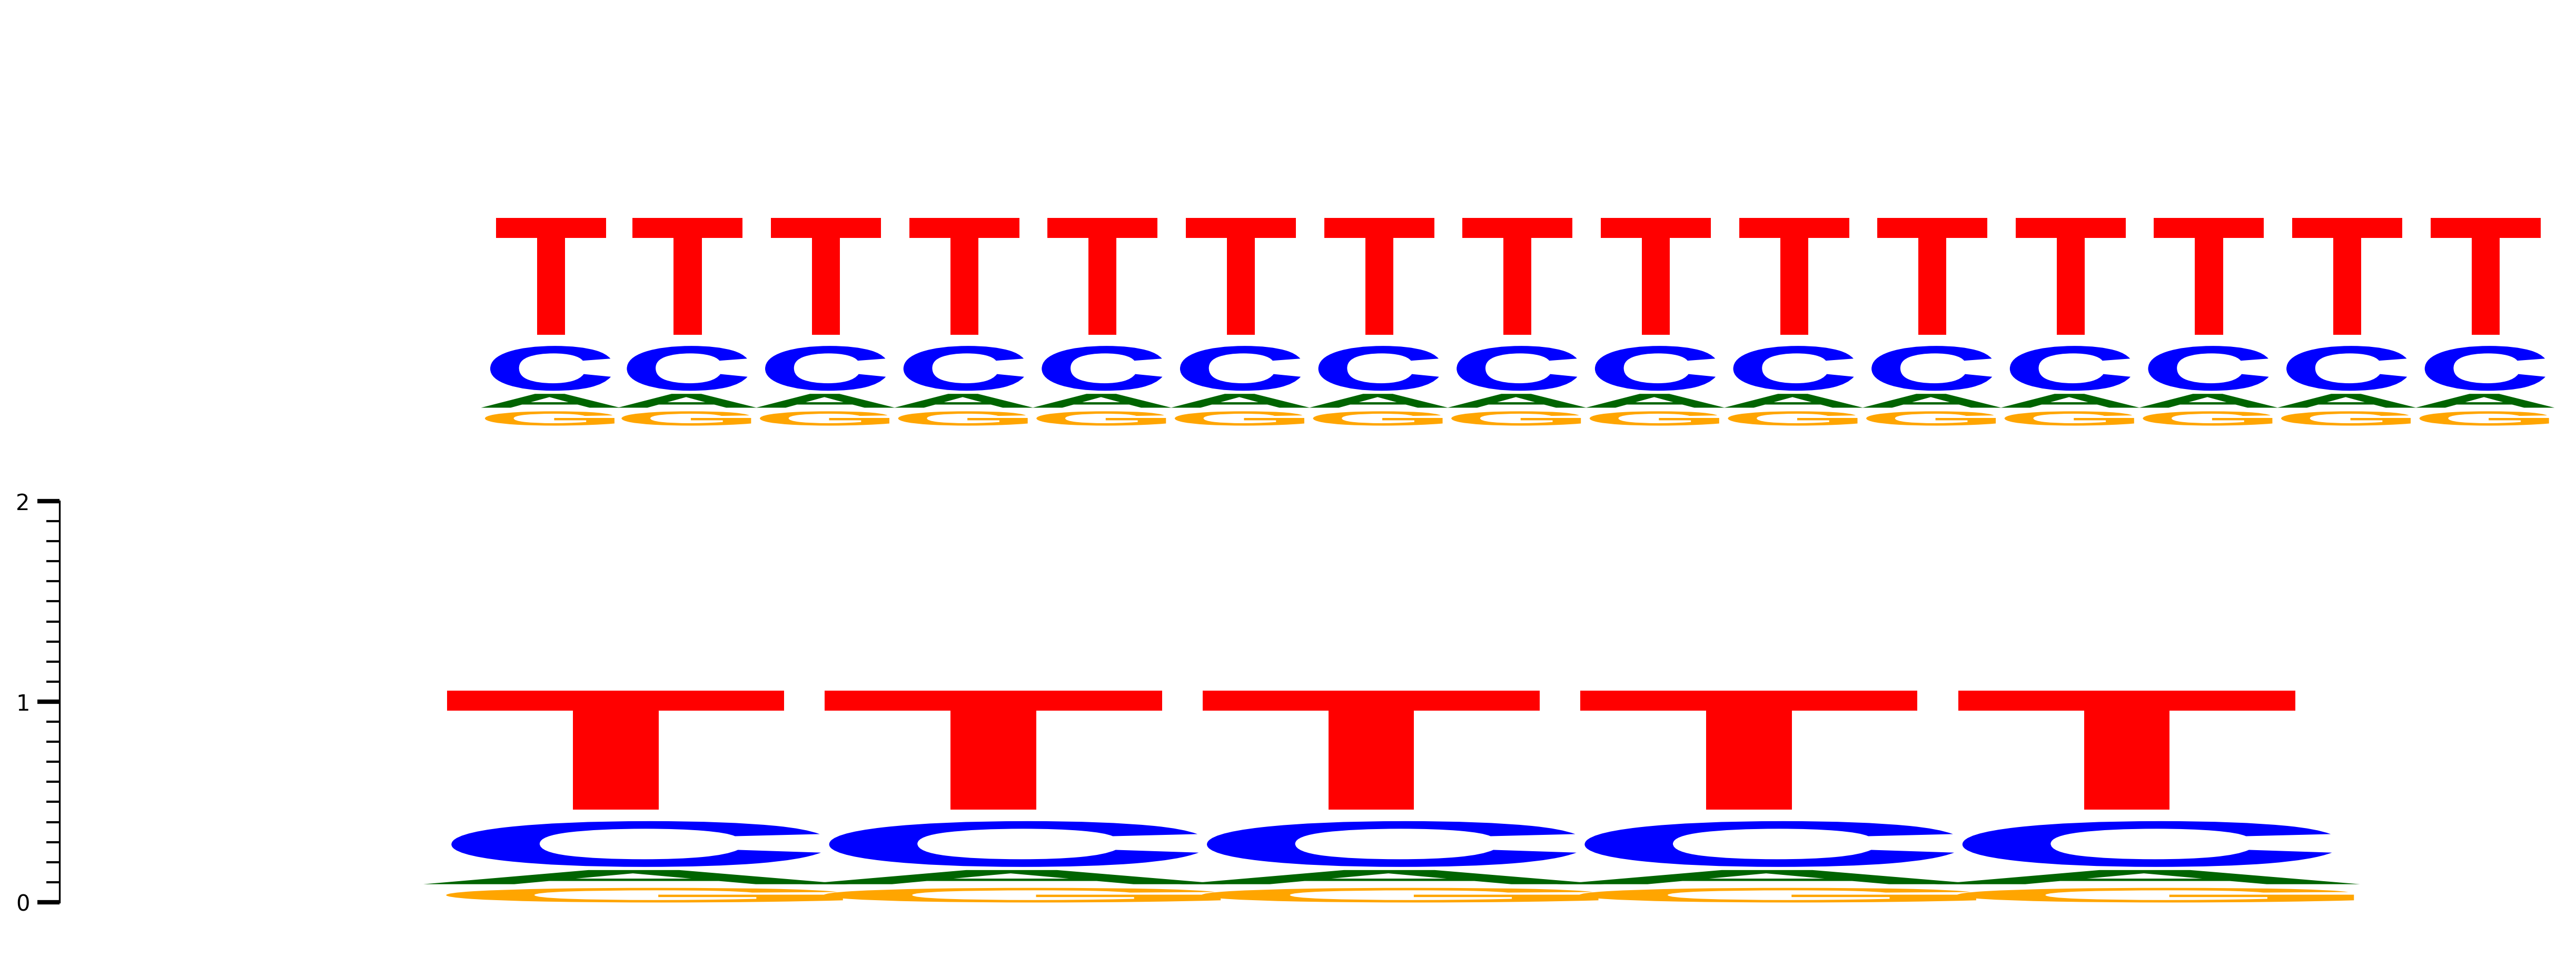

In [7]:
ALL_SCORES = [[('G', 0.1),
              ('A', 0.1),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)]] * 15
ALL_SCORES2 = [[('G', 0.1),
              ('A', 0.1),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)]] * 5
stem_scores = np.random.rand(6)
fig, axarr = draw_logo(ALL_SCORES, data_type='bits', nrow=2, ncol=1)
#fig.subplots_adjust(left=0,right=0.1,bottom=0,top=1)
ax = axarr[1,0]
draw_protein(ALL_SCORES2, ax, scalex=3)
setup_axis(axarr[1,0], axis='y', majorticks=1, minorticks=0.1)
fig.tight_layout()#rect=[0, 0.03, 1, 0.95])

In [ ]:
ALL_SCORES = [[('G', 0.1),
              ('A', 0.1),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)]] * 50
ALL_SCORES2 = [[('G', 0.1),
              ('A', 0.1),
              ('C', 0.31312908494534769),
              ('T', 0.84220926295645249)]] * 5
stem_scores = np.random.rand(6)
fig, axarr = draw_logo(ALL_SCORES, data_type='bits', nrow=2, ncol=1)
#fig.subplots_adjust(left=0,right=0.1,bottom=0,top=1)
ax = axarr[1,0]

# JASPAR

In [ ]:
ex = '../data/jaspardb/MA0002.2.jaspar'
fig, axarr = draw_logo(ex, data_type='jaspar', nrow=1, ncol=1)
#from Bio import motifs

#m = motifs.parse(open(ex, 'r'), 'JASPAR')[0]

In [ ]:
sum(m.counts[m.counts.keys[0]])

In [ ]:
m.counts[m.counts.keys[0]]

In [ ]:
m.counts['A']

In [ ]:
list(m.counts.viewvalues())[0]